# Analisis y Mezcla de los datos

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#Read Data
DATA_NAME = 'resultados/resultados_parte{}.csv'
data_parts = [1,2,3,4,5,6,7]
csv_objects = []

for part in data_parts:
    csv_objects.append(pd.read_csv(DATA_NAME.format(part)))
    
    


In [3]:
#Join Data

data = csv_objects[1]

for csv_object in csv_objects[1:]:
    data = pd.merge(data, csv_object, how='outer')
    

In [4]:
# Preview data.
data

,community_score,community_score_phrase,description,developers,genres,ign_score,ign_score_phrase,platforms,price,publisher,rating_category,rating_content,related_games,release_date,review_link,title,url
0,6.2,Okay,Imagine driving a big monster truck on a Moon-...,Crystal Dynamics,Action,4.0,Bad,PS Saturn,27.99 USD,Crystal Dynamics,M for Mature,Animated Violence,http://www.ign.com/games/metal-gear-solid/ps-5...,"May 27, 1997",http://psx.ign.com/articles/150/150704p1.html,Off-World Interceptor Extreme,http://www.ign.com/games/off-world-interceptor...
1,6.8,Okay,"Rez is out to destroy the Television Realm, an...",Crystal Dynamics,Platformer,6.0,Okay,PS Saturn 3DO PC PSP PS3,27.99 USD,Crystal Dynamics,E for Everyone,Mild Animated Violence,http://www.ign.com/games/crash-bandicoot/ps-60...,"Jan 1, 1996",http://psx.ign.com/articles/150/150149p1.html,Gex,http://www.ign.com/games/gex/ps-149
2,7.2,Good,The evil Baron Dark has stolen the Lightstar C...,Neversoft Entertainment,Action,5.0,Mediocre,PS LCD Saturn,31.99 USD,Playmates,E for Everyone,Animated Violence,http://www.ign.com/games/metal-gear-solid/ps-5...,"Jun 1, 1997",http://psx.ign.com/articles/150/150707p1.html,Skeleton Warriors,http://www.ign.com/games/skeleton-warriors/ps-707
3,6.5,Okay,Try to escape from Sin Sin Prison and clear yo...,Arc Developments,Platformer,5.0,Mediocre,PS PC 3DO Saturn,56.99 USD,Acclaim Entertainment,E for Everyone,Animated Violence,http://www.ign.com/games/crash-bandicoot/ps-60...,"May 26, 1997",http://psx.ign.com/articles/150/150674p1.html,Johnny Bazookatone,http://www.ign.com/games/johnny-bazookatone/ps...
4,6.5,Okay,PGA TOUR¿96 is an early entry in the long line...,Electronic Arts,Sports,7.0,Good,PS Gen PC SNES Saturn 3DO GB,57.99 USD,Electronic Arts,K-A for No Rating,NaN,http://www.ign.com/games/ncaa-football-2001/ps...,"Jan 1, 1996",http://psx.ign.com/articles/150/150165p1.html,PGA Tour '96,http://www.ign.com/games/pga-tour-96/ps-165
5,8.0,Great,"Go retro with Namco Museum Vol. 1, a collectio...",Namco,Action,8.0,Great,PS PS3 Vita PSP,NaN,Namco,E for Everyone,NaN,http://www.ign.com/games/metal-gear-solid/ps-5...,"May 27, 1997",http://psx.ign.com/articles/150/150702p1.html,Namco Museum Vol. 1,http://www.ign.com/games/namco-museum-vol-1/ps...
6,7.5,Good,"Race the world's most exciting supercars, each...","EA Canada, Pioneer Productions",Racing,7.0,Good,PS PC 3DO Saturn PC,34.99 USD,Electronic Arts,E for Everyone,NaN,http://www.ign.com/games/gran-turismo-1998/ps-...,"May 27, 1997",http://psx.ign.com/articles/151/151864p1.html,Road & Track Presents: The Need for Speed,http://www.ign.com/games/road-and-track-presen...
7,6.9,Okay,The rally is on! Four venomous computer oppone...,SCEA,Racing,7.0,Good,PS Android PS3 PSP,29.99 USD,Sony Computer Entertainment,E for Everyone,No Descriptors,http://www.ign.com/games/gran-turismo-1998/ps-...,"Nov 17, 1997",http://psx.ign.com/articles/150/150757p1.html,Rally Cross,http://www.ign.com/games/rally-cross/ps-757
8,6.1,Okay,"It isn't every day that a unique, innovative a...",Boss Game Studios,Action,6.0,Okay,PS 2600,46.99 USD,BMG Interactive,NaN,NaN,http://www.ign.com/games/metal-gear-solid/ps-5...,"Dec 5, 1996",http://psx.ign.com/articles/150/150614p1.html,Spider,http://www.ign.com/games/spider/ps-614
9,7.2,Good,When elements of Tag are combined with element...,Radical Entertainment,Action,6.0,Okay,PS PC Saturn,26.47 USD,Virgin Interactive,K-A for No Rating,Animated Violence,http://www.ign.com/games/metal-gear-solid/ps-5...,"Oct 14, 1996",http://psx.ign.com/articles/150/150434p1.html,Grid Runner,http://www.ign.com/games/grid-runner/ps-434


##### Reordenar columnas

In [5]:
cols = [
    'title',
    'url',
    'description',
    'related_games',
    
    'genres',
    'platforms',

    'ign_score',
    'ign_score_phrase',
    'community_score',
    'community_score_phrase',
    
    'publisher',
    'developers',
    'rating_category',
    'rating_content',
    
    'release_date',
    'price',
    
    'review_link',
 ]

data = data[cols]    

##### Filtramos por Descripcion no nula. Algo mas?

In [6]:
# Filter empty description 
data = data[data.description.notnull()]
data = data[data.title.notnull() ]
data = data[data.url.notnull() ]

##### Vemos los resultados de los datos antes de ser guardados.

In [7]:
data

,title,url,description,related_games,genres,platforms,ign_score,ign_score_phrase,community_score,community_score_phrase,publisher,developers,rating_category,rating_content,release_date,price,review_link
0,Off-World Interceptor Extreme,http://www.ign.com/games/off-world-interceptor...,Imagine driving a big monster truck on a Moon-...,http://www.ign.com/games/metal-gear-solid/ps-5...,Action,PS Saturn,4.0,Bad,6.2,Okay,Crystal Dynamics,Crystal Dynamics,M for Mature,Animated Violence,"May 27, 1997",27.99 USD,http://psx.ign.com/articles/150/150704p1.html
1,Gex,http://www.ign.com/games/gex/ps-149,"Rez is out to destroy the Television Realm, an...",http://www.ign.com/games/crash-bandicoot/ps-60...,Platformer,PS Saturn 3DO PC PSP PS3,6.0,Okay,6.8,Okay,Crystal Dynamics,Crystal Dynamics,E for Everyone,Mild Animated Violence,"Jan 1, 1996",27.99 USD,http://psx.ign.com/articles/150/150149p1.html
2,Skeleton Warriors,http://www.ign.com/games/skeleton-warriors/ps-707,The evil Baron Dark has stolen the Lightstar C...,http://www.ign.com/games/metal-gear-solid/ps-5...,Action,PS LCD Saturn,5.0,Mediocre,7.2,Good,Playmates,Neversoft Entertainment,E for Everyone,Animated Violence,"Jun 1, 1997",31.99 USD,http://psx.ign.com/articles/150/150707p1.html
3,Johnny Bazookatone,http://www.ign.com/games/johnny-bazookatone/ps...,Try to escape from Sin Sin Prison and clear yo...,http://www.ign.com/games/crash-bandicoot/ps-60...,Platformer,PS PC 3DO Saturn,5.0,Mediocre,6.5,Okay,Acclaim Entertainment,Arc Developments,E for Everyone,Animated Violence,"May 26, 1997",56.99 USD,http://psx.ign.com/articles/150/150674p1.html
4,PGA Tour '96,http://www.ign.com/games/pga-tour-96/ps-165,PGA TOUR¿96 is an early entry in the long line...,http://www.ign.com/games/ncaa-football-2001/ps...,Sports,PS Gen PC SNES Saturn 3DO GB,7.0,Good,6.5,Okay,Electronic Arts,Electronic Arts,K-A for No Rating,NaN,"Jan 1, 1996",57.99 USD,http://psx.ign.com/articles/150/150165p1.html
5,Namco Museum Vol. 1,http://www.ign.com/games/namco-museum-vol-1/ps...,"Go retro with Namco Museum Vol. 1, a collectio...",http://www.ign.com/games/metal-gear-solid/ps-5...,Action,PS PS3 Vita PSP,8.0,Great,8.0,Great,Namco,Namco,E for Everyone,NaN,"May 27, 1997",NaN,http://psx.ign.com/articles/150/150702p1.html
6,Road & Track Presents: The Need for Speed,http://www.ign.com/games/road-and-track-presen...,"Race the world's most exciting supercars, each...",http://www.ign.com/games/gran-turismo-1998/ps-...,Racing,PS PC 3DO Saturn PC,7.0,Good,7.5,Good,Electronic Arts,"EA Canada, Pioneer Productions",E for Everyone,NaN,"May 27, 1997",34.99 USD,http://psx.ign.com/articles/151/151864p1.html
7,Rally Cross,http://www.ign.com/games/rally-cross/ps-757,The rally is on! Four venomous computer oppone...,http://www.ign.com/games/gran-turismo-1998/ps-...,Racing,PS Android PS3 PSP,7.0,Good,6.9,Okay,Sony Computer Entertainment,SCEA,E for Everyone,No Descriptors,"Nov 17, 1997",29.99 USD,http://psx.ign.com/articles/150/150757p1.html
8,Spider,http://www.ign.com/games/spider/ps-614,"It isn't every day that a unique, innovative a...",http://www.ign.com/games/metal-gear-solid/ps-5...,Action,PS 2600,6.0,Okay,6.1,Okay,BMG Interactive,Boss Game Studios,NaN,NaN,"Dec 5, 1996",46.99 USD,http://psx.ign.com/articles/150/150614p1.html
9,Grid Runner,http://www.ign.com/games/grid-runner/ps-434,When elements of Tag are combined with element...,http://www.ign.com/games/metal-gear-solid/ps-5...,Action,PS PC Saturn,6.0,Okay,7.2,Good,Virgin Interactive,Radical Entertainment,K-A for No Rating,Animated Violence,"Oct 14, 1996",26.47 USD,http://psx.ign.com/articles/150/150434p1.html


In [8]:
data['description'] = data['description'].str.replace('\n\n', '')
data['description'] = data['description'].str.replace('\n', '')
data['description'] = data['description'].str.replace('\t', '')
data['description'] = data['description'].str.replace('\r', '')
data['description'] = data['description'].str.rstrip()
#data[160:170]

#with pd.option_context('display.max_rows', 100000, 'display.max_columns', 10000, 'display.max_colwidth', 10000000):
#    print(data[166:167])




##### Vereficamos que hay datos faltantes y luego los rellenamos con null.

In [9]:
#1537       False            False            True         False   True   
print (data.isnull())

      title    url  description  related_games  genres  platforms  ign_score  \
0     False  False        False          False   False      False      False   
1     False  False        False          False   False      False      False   
2     False  False        False          False   False      False      False   
3     False  False        False          False   False      False      False   
4     False  False        False          False   False      False      False   
5     False  False        False          False   False      False      False   
6     False  False        False          False   False      False      False   
7     False  False        False          False   False      False      False   
8     False  False        False          False   False      False      False   
9     False  False        False          False   False      False      False   
10    False  False        False          False   False      False      False   
11    False  False        False         

In [10]:
data = data.fillna(value="null")

In [11]:
#1537 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False 	False

data.isnull()

,title,url,description,related_games,genres,platforms,ign_score,ign_score_phrase,community_score,community_score_phrase,publisher,developers,rating_category,rating_content,release_date,price,review_link
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Guardamos los datos

In [12]:
# Save Data...
data.to_csv(os.getcwd() +'/resultados/all_data.csv', index = False, sep = "\t" )

## Histogramas (Ninguna utilidad practica...)

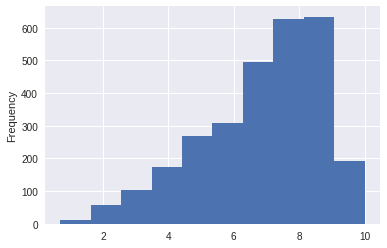

In [13]:
#Histograma de las notas de IGN.
data.ign_score.plot.hist()

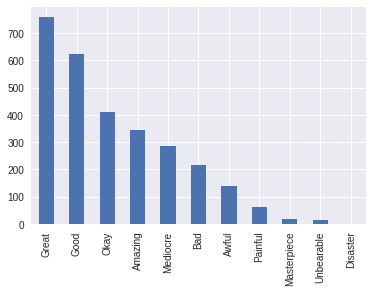

In [14]:
testdf = data
testdf.ign_score_phrase.value_counts().plot(kind='bar')

In [15]:
#Histograma de las notas de los usuarios.
data.community_score.plot.hist()


TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
testdf = data
testdf.community_score_phrase.value_counts().plot(kind='bar')

In [ ]:
# Histograma por Publisher
data.publisher.value_counts().plot(kind='bar')